In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
permRef = 1.0
permMin = 0.0001

nRef = 0.35
nMin = 0.03

n = np.linspace(nMin, nRef, 50)
nExponent = 3.0

def clogging_perm(n):
    return ((permRef - permMin) * np.power((n - nMin)/(nRef - nMin),nExponent)) + permMin

# *******
nUnsat = 7.26
mUnsat = 1 - 1/nUnsat

def unsat_perm(θe):
    return np.sqrt(θe) * np.power(1-np.power(1-np.power(θe, 1/mUnsat), mUnsat), 2)

In [17]:
n = np.linspace(nMin, nRef, 50)
θe = np.linspace(0.001, 1.0, 50)

k_unsat = unsat_perm(θe)
k_clogg = clogging_perm(n)

tt, nn = np.meshgrid(θe,n)
kk = unsat_perm(tt) * clogging_perm(nn)

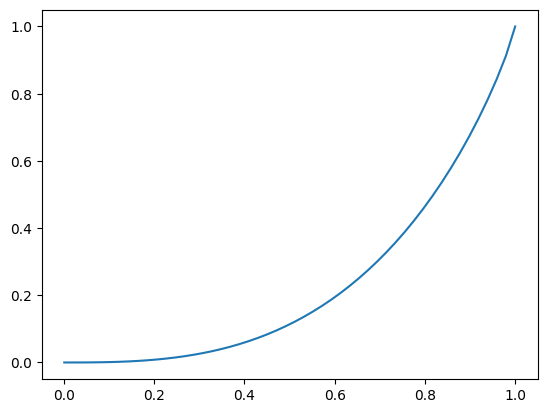

In [18]:
plt.plot(θe, k_unsat)

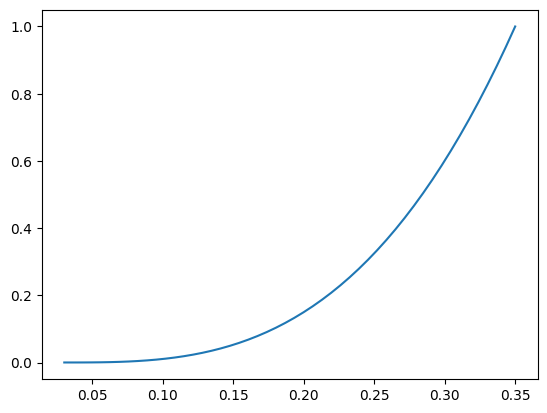

In [19]:
plt.plot(n, k_clogg)

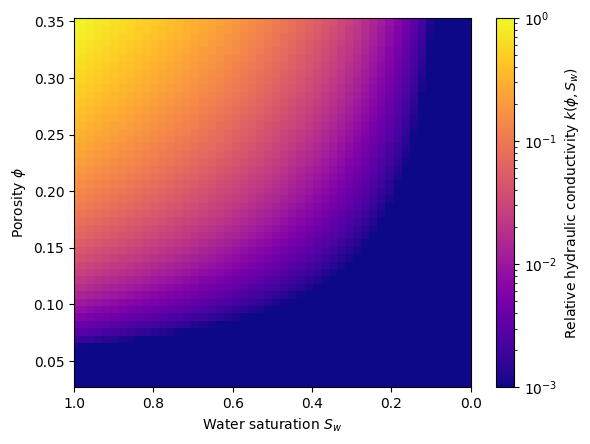

In [29]:
from matplotlib import colors

fig, ax = plt.subplots()
img = ax.pcolormesh(tt,nn,kk, cmap="plasma", norm=colors.LogNorm(vmin=0.001, vmax=1))
ax.set_xlabel(r"Water saturation $S_w$")
ax.set_ylabel(r"Porosity $\phi$")
plt.colorbar(img, label="Relative hydraulic conductivity $k(\phi, S_w)$")
ax.set_xlim(1.0, 0.0)
plt.show()

In [13]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=tt, y=nn, z=kk)])

fig.update_layout(title=r'$k(\phi ,S_w)$', autosize=False,
                  width=800, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()